In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [57]:
data = pd.read_csv("Data KP Gempa Bumi Wilayah Sumatera Selatan Dan Sekitarnya.csv")
data

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place
0,4,10,2022,20:14:43,-4.9967,104.2793,112.997,4.40,Kotabumi
1,1,10,2022,13:50:16,-3.8325,101.8353,60.652,4.90,Bengkulu
2,29,9,2022,12:56:31,-5.4541,102.6805,37.099,4.50,kotabumi
3,19,9,2022,19:16:25,-5.5071,102.8860,38.085,4.20,Pagar Alam
4,13,9,2022,11:18:03,-5.6133,104.1844,96.048,4.90,Kotabumi
...,...,...,...,...,...,...,...,...,...
2807,15,4,1916,12:31:43,-4.3380,102.5970,35.000,6.71,Bengkulu
2808,14,7,1914,3:10:26,-5.3050,102.5790,30.000,6.32,Pagar Alam
2809,25,6,1914,19:07:25,-4.0120,101.6380,35.000,7.55,Bengkulu
2810,3,6,1909,18:40:43,-2.7130,101.1880,35.000,7.58,Sungai Penuh


In [58]:
minutes = []
hours = []
seconds = []

for t in data.Time:
    t  = t.split(":")
    minutes.append(t[1])
    hours.append(t[0])
    seconds.append(t[2])

In [59]:
data['Time'] = pd.to_datetime(data['Time'])

In [60]:
data['Jam'] = data['Time'].dt.hour
data['Menit'] = data['Time'].dt.minute
data['Detik'] = data['Time'].dt.second

In [61]:
data.drop(['Time'], axis=1, inplace=True)
data.head()


,Day,Month,Years,Latitude,Longitude,Depth,Mag,Place,Jam,Menit,Detik
0,4,10,2022,-4.9967,104.2793,112.997,4.4,Kotabumi,20,14,43
1,1,10,2022,-3.8325,101.8353,60.652,4.9,Bengkulu,13,50,16
2,29,9,2022,-5.4541,102.6805,37.099,4.5,kotabumi,12,56,31
3,19,9,2022,-5.5071,102.8860,38.085,4.2,Pagar Alam,19,16,25
4,13,9,2022,-5.6133,104.1844,96.048,4.9,Kotabumi,11,18,3


In [62]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

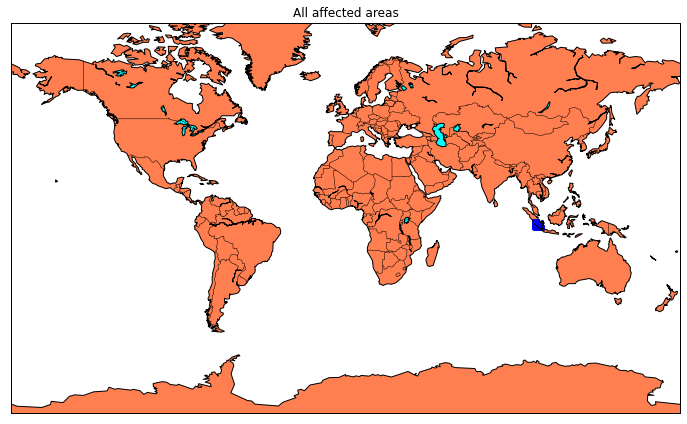

In [63]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [64]:
data['label'] = pd.cut(data['Mag'], bins=[0, 4, 6, float('inf')], labels=['gempa lemah', 'gempa sedang', 'gempa kuat'])
data

,Day,Month,Years,Latitude,Longitude,Depth,Mag,Place,Jam,Menit,Detik,label
0,4,10,2022,-4.9967,104.2793,112.997,4.40,Kotabumi,20,14,43,gempa sedang
1,1,10,2022,-3.8325,101.8353,60.652,4.90,Bengkulu,13,50,16,gempa sedang
2,29,9,2022,-5.4541,102.6805,37.099,4.50,kotabumi,12,56,31,gempa sedang
3,19,9,2022,-5.5071,102.8860,38.085,4.20,Pagar Alam,19,16,25,gempa sedang
4,13,9,2022,-5.6133,104.1844,96.048,4.90,Kotabumi,11,18,3,gempa sedang
...,...,...,...,...,...,...,...,...,...,...,...,...
2807,15,4,1916,-4.3380,102.5970,35.000,6.71,Bengkulu,12,31,43,gempa kuat
2808,14,7,1914,-5.3050,102.5790,30.000,6.32,Pagar Alam,3,10,26,gempa kuat
2809,25,6,1914,-4.0120,101.6380,35.000,7.55,Bengkulu,19,7,25,gempa kuat
2810,3,6,1909,-2.7130,101.1880,35.000,7.58,Sungai Penuh,18,40,43,gempa kuat


In [65]:
label_dummies = pd.get_dummies(data['label'])

In [66]:
dataset = pd.concat([data, label_dummies], axis=1)

In [67]:
print(dataset.head())

   Day  Month  Years  Latitude  Longitude    Depth  Mag        Place  Jam  \
0    4     10   2022   -4.9967   104.2793  112.997  4.4     Kotabumi   20   
1    1     10   2022   -3.8325   101.8353   60.652  4.9     Bengkulu   13   
2   29      9   2022   -5.4541   102.6805   37.099  4.5    kotabumi    12   
3   19      9   2022   -5.5071   102.8860   38.085  4.2   Pagar Alam   19   
4   13      9   2022   -5.6133   104.1844   96.048  4.9     Kotabumi   11   

   Menit  Detik         label  gempa lemah  gempa sedang  gempa kuat  
0     14     43  gempa sedang            0             1           0  
1     50     16  gempa sedang            0             1           0  
2     56     31  gempa sedang            0             1           0  
3     16     25  gempa sedang            0             1           0  
4     18      3  gempa sedang            0             1           0  


In [68]:
data.head()

,Day,Month,Years,Latitude,Longitude,Depth,Mag,Place,Jam,Menit,Detik,label
0,4,10,2022,-4.9967,104.2793,112.997,4.4,Kotabumi,20,14,43,gempa sedang
1,1,10,2022,-3.8325,101.8353,60.652,4.9,Bengkulu,13,50,16,gempa sedang
2,29,9,2022,-5.4541,102.6805,37.099,4.5,kotabumi,12,56,31,gempa sedang
3,19,9,2022,-5.5071,102.8860,38.085,4.2,Pagar Alam,19,16,25,gempa sedang
4,13,9,2022,-5.6133,104.1844,96.048,4.9,Kotabumi,11,18,3,gempa sedang


In [69]:
X = data[['Detik', 'Menit', 'Jam', 'Day', 'Month', 'Years', 'Latitude', 'Longitude', 'Depth']]
y = data['label']

In [70]:
X

,Detik,Menit,Jam,Day,Month,Years,Latitude,Longitude,Depth
0,43,14,20,4,10,2022,-4.9967,104.2793,112.997
1,16,50,13,1,10,2022,-3.8325,101.8353,60.652
2,31,56,12,29,9,2022,-5.4541,102.6805,37.099
3,25,16,19,19,9,2022,-5.5071,102.8860,38.085
4,3,18,11,13,9,2022,-5.6133,104.1844,96.048
...,...,...,...,...,...,...,...,...,...
2807,43,31,12,15,4,1916,-4.3380,102.5970,35.000
2808,26,10,3,14,7,1914,-5.3050,102.5790,30.000
2809,25,7,19,25,6,1914,-4.0120,101.6380,35.000
2810,43,40,18,3,6,1909,-2.7130,101.1880,35.000


In [71]:
y

0       gempa sedang
1       gempa sedang
2       gempa sedang
3       gempa sedang
4       gempa sedang
            ...     
2807      gempa kuat
2808      gempa kuat
2809      gempa kuat
2810      gempa kuat
2811      gempa kuat
Name: label, Length: 2812, dtype: category
Categories (3, object): ['gempa lemah' < 'gempa sedang' < 'gempa kuat']

In [82]:
y_pred

array(['gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa kuat',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       'gempa sedang', 'gempa sedang', 'gempa sedang', 'gempa sedang',
       '

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [85]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')


In [86]:
y_pred = rf_model.predict(X_test)


In [87]:
X

,Detik,Menit,Jam,Day,Month,Years,Latitude,Longitude,Depth
0,43,14,20,4,10,2022,-4.9967,104.2793,112.997
1,16,50,13,1,10,2022,-3.8325,101.8353,60.652
2,31,56,12,29,9,2022,-5.4541,102.6805,37.099
3,25,16,19,19,9,2022,-5.5071,102.8860,38.085
4,3,18,11,13,9,2022,-5.6133,104.1844,96.048
...,...,...,...,...,...,...,...,...,...
2807,43,31,12,15,4,1916,-4.3380,102.5970,35.000
2808,26,10,3,14,7,1914,-5.3050,102.5790,30.000
2809,25,7,19,25,6,1914,-4.0120,101.6380,35.000
2810,43,40,18,3,6,1909,-2.7130,101.1880,35.000


In [88]:
new_data = [[22,20,21,4,4,2018,-3.26,104.99,102]]  # example of new data
prediction = rf_model.predict(new_data)
print('Prediction:', prediction)

Prediction: ['gempa sedang']


C:\Users\User\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [89]:
from sklearn.metrics import precision_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9520426287744227


In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  gempa kuat       0.83      0.45      0.59        11
 gempa lemah       0.33      0.05      0.09        20
gempa sedang       0.96      1.00      0.98       532

    accuracy                           0.95       563
   macro avg       0.71      0.50      0.55       563
weighted avg       0.93      0.95      0.94       563

